In [1]:
import pandas as pd


In [2]:
print("hello")

hello


In [3]:
out = pd.read_csv('build/tests/Release/result.csv')  

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(out)

                                      name  iterations     real_time  \
0                          CM_diag/16_mean           5  4.220720e+04   
1                        CM_diag/16_median           5  4.223420e+04   
2                        CM_diag/16_stddev           5  2.754270e+02   
3                          CM_diag/32_mean           5  6.809600e+04   
4                        CM_diag/32_median           5  6.780910e+04   
5                        CM_diag/32_stddev           5  8.533960e+02   
6                          CM_diag/48_mean           5  1.361960e+05   
7                        CM_diag/48_median           5  1.361600e+05   
8                        CM_diag/48_stddev           5  7.325150e+02   
9                          CM_diag/64_mean           5  3.880030e+05   
10                       CM_diag/64_median           5  3.875910e+05   
11                       CM_diag/64_stddev           5  2.150200e+03   
12                         CM_diag/80_mean           5  1.901600

In [4]:
out = pd.read_csv('build/tests/Release/result.csv')  
out = out.drop(["iterations", "time_unit", "bytes_per_second", "items_per_second", "label","error_occurred", "error_message", "cpu_time"], axis =1 )
spill_res = out["name"].str.rsplit("/")
print(spill_res)
#spill_res = spill_res.spill('_')
names = ["type", "size_tmp"]
data = spill_res.to_list()

new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, out], axis=1)
res = res.drop("name", axis = 1)
print(res)

spill_res = res["size_tmp"].str.rsplit("_")
print(spill_res)
names = ["size", "what"]
data = spill_res.to_list()

new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, res], axis=1)
res = res.drop("size_tmp", axis = 1)
print(res)




res["size"]  =  pd.to_numeric(res["size"])

0                     [CM_diag, 16_mean]
1                   [CM_diag, 16_median]
2                   [CM_diag, 16_stddev]
3                     [CM_diag, 32_mean]
4                   [CM_diag, 32_median]
                     ...                
196    [OCL_diag_choose_size, 32_median]
197    [OCL_diag_choose_size, 32_stddev]
198      [OCL_diag_choose_size, 64_mean]
199    [OCL_diag_choose_size, 64_median]
200    [OCL_diag_choose_size, 64_stddev]
Name: name, Length: 201, dtype: object
                     type   size_tmp     real_time  iterations.1
0                 CM_diag    16_mean  4.220720e+04           358
1                 CM_diag  16_median  4.223420e+04           358
2                 CM_diag  16_stddev  2.754270e+02             0
3                 CM_diag    32_mean  6.809600e+04          1434
4                 CM_diag  32_median  6.780910e+04          1434
..                    ...        ...           ...           ...
196  OCL_diag_choose_size  32_median  7.602240e+08     

In [5]:
res.dtypes

size              int64
what             object
type             object
real_time       float64
iterations.1      int64
dtype: object

In [6]:
res

,size,what,type,real_time,iterations.1
0,16,mean,CM_diag,4.220720e+04,358
1,16,median,CM_diag,4.223420e+04,358
2,16,stddev,CM_diag,2.754270e+02,0
3,32,mean,CM_diag,6.809600e+04,1434
4,32,median,CM_diag,6.780910e+04,1434
...,...,...,...,...,...
196,32,median,OCL_diag_choose_size,7.602240e+08,3228
197,32,stddev,OCL_diag_choose_size,1.553410e+07,0
198,64,mean,OCL_diag_choose_size,8.187410e+08,3228
199,64,median,OCL_diag_choose_size,8.172510e+08,3228


In [7]:
OCL_diag=res["type"] == "OCL_diag"
OCL_diag_local=res["type"] == "OCL_diag_local"
CM_diag  = res["type"] == "CM_diag"
CPU_diag  = res["type"] == "CPU_diag"
CPU_diag_omp  = res["type"] == "CPU_diag_omp"
CPU_diag_calculations_only = res["type"]== "CPU_diag_calculations_only"
CM_diag_calculations_only = res["type"]== "CM_diag_calculations_only"
OCL_diag_calculations_only = res["type"]== "OCL_diag_calculations_only"

mean = res["what"] == "mean"



In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


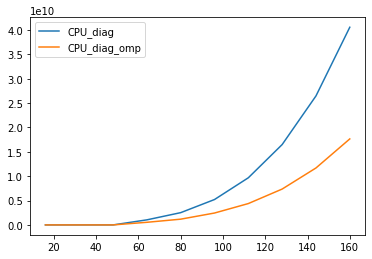

In [9]:
# CPU realisations difference
plt.plot(res[CPU_diag][mean]["size"], res[CPU_diag][mean]["real_time"],label='CPU_diag')
plt.plot(res[CPU_diag_omp][mean]["size"], res[CPU_diag_omp][mean]["real_time"],label='CPU_diag_omp')
plt.legend()
plt.show()

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


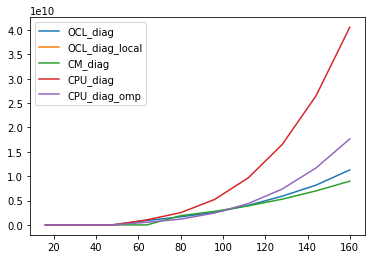

In [10]:
plt.plot(res[OCL_diag][mean]["size"], res[OCL_diag][mean]["real_time"],label='OCL_diag')
plt.plot(res[OCL_diag_local][mean]["size"], res[OCL_diag_local][mean]["real_time"],label='OCL_diag_local')
plt.plot(res[CM_diag][mean]["size"], res[CM_diag][mean]["real_time"],label='CM_diag')
plt.plot(res[CPU_diag][mean]["size"], res[CPU_diag][mean]["real_time"],label='CPU_diag')
plt.plot(res[CPU_diag_omp][mean]["size"], res[CPU_diag_omp][mean]["real_time"],label='CPU_diag_omp')
plt.legend()
plt.show()

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


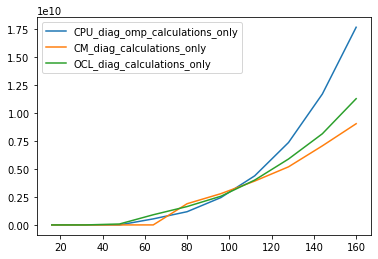

In [11]:
plt.plot(res[CPU_diag_omp][mean]["size"], res[CPU_diag_omp][mean]["real_time"],label='CPU_diag_omp_calculations_only')
plt.plot(res[CM_diag_calculations_only][mean]["size"], res[CM_diag_calculations_only][mean]["real_time"],label='CM_diag_calculations_only')
plt.plot(res[OCL_diag_calculations_only][mean]["size"], res[OCL_diag_calculations_only][mean]["real_time"],label='OCL_diag_calculations_only')
plt.legend()
plt.show()